In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


$$\newcommand{\nr}[1]{\|#1\|}
\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\N}{\mathbb{N}}
$$
### Cours accéléré analyse numérique - M2 AMS 2023/24

# Équation de transport et lois de conservation scalaires - discrétisation par volumes finis


L'équation de transport est l'équation linéaire
\begin{equation*}
\frac{\partial }{\partial t}u(t,x)+\frac{\partial }
{\partial  x}\big(b(t,x)u(t,x)\big)=0,\ x\in\R,\ t>0,
\end{equation*}
où la vitesse $v$ est une fonction de classe $C^1$ donnée. Cette équation décrit des phénomènes de transport à vitesse $b$ : d'un fluide, d'une nuage de fumée, d'une densité de véhicules,$\dots$. Si la vitesse $b$ est constante, supposons connue la configuration de $u$ à l'instant initial $t=0 : u(0,x)=u_0(x)$, avec $u_0$ fonction de classe $C^1$ donnée. Alors la solution du problème de Cauchy
\begin{equation}\label{tra}
\begin{cases}
{\frac{\partial }{\partial t}u(t,x)+\frac{\partial }
{\partial  x}\big(bu(t,x)\big)=0},&x\in\R,\ t>0,\\
u_{|_{t=0}}=u_{0},& x\in\R,
\end{cases}
\end{equation}
est donnée par
$$
u(t,x)=u_0(x-bt),\ x\in\R,\ t>0.
$$

Une loi de conservation est une équation non linéaire de la forme
\begin{equation}\label{lcs}
\frac{\partial }{\partial t}u+\frac{\partial }
{\partial  x}f(u)=0,\ x\in\R,\ t>0,
\end{equation}
où la fonction $f$, appelée le flux, est une fonction de classe $C^1$ donnée. Cette équation peut être vue comme une équation de transport où la vitesse dépend de la solution. Une des caractéristiques principales de cette équation est que ses solutions peuvent devenir discontinues, même lorsque la donnée initiale est continue. On doit alors chercher des solutions faibles de cette équation, au sens des distributions, autrement dit des solutions $u$ vérifiant
$$
\int_0^{+\infty}\int_\R (u\varphi_t+f(u)\varphi_x)dt\,dx=0,
$$
pour toute fonction $\varphi\in\mathcal{C}_C^{\infty}(]0,+\infty\times\R)$.

L'idée de la méthode des volumes finis pour approcher les solutions de ce type d'équations est de diviser le domaine $[0,+\infty[\times\R$ en des volumes de contrôle, d'**intégrer la solution $u$ dans ces volumes**, en prenant comme fonction test $\varphi$ une fonction approchant la fonction indicatrice des volumes, et d'approcher les flux au bord. Ici on va considérer des volumes associés à un maillage cartésien de $[0,+\infty[\times\R$, c'est-à-dire des volumes de la forme
$$
[t^n,t^{n+1}[\times[x_j,x_{j+1}[,
$$
avec $t^n=nk$ et $x_j=jh$, $k$ et $h$ étant respectivement les pas de temps et d'espace. Dans ce cadre, l'écriture d'un schéma de volumes fines est analogue à celle d'un schéma de différences finies.



On s'intéresse ici à la résolution numérique de l'équation de transport sur $[0,T]\times [0,1]$ avec une vitesse variable $b$ (mais pas dépendante du temps) avec des conditions au bord périodiques. On cherche donc $\newcommand{\Rsp}{\mathbb{R}}
u: [0,T]\times \Rsp$ vérifiant l'équation

$$
(T)\quad \left\{\begin{aligned}
&\frac{\partial u}{\partial t}(t,x) + b(x) \frac{\partial u}{\partial x}(t,x) = 0  \hbox{ sur } [0,1]\times (0,T]\\
&u(t,x+1) = u(t,x) \hbox{ pour } t\in [0,T]\\
&u(0,\cdot) = u_0
\end{aligned}\right.,
$$

où l'on suppose que $b: \Rsp\to\Rsp$ est également $1$-périodique: $b(x+1) = b(x)$.

Pour cela on introduit :

- le nombre de points de la discrétisation de l'intervalle  $[a,b]$, $h=(b-a)/(M+1)$ le pas de la discrétisation et $x_j=a+jh,\ j=0,\dots,M+1$ les points du maillage spatial ;
- le pas de temps $k>0$ et $t^n=nk,\ n\in\N$, les instants temporels ;
- le nombre $\lambda=b\frac kh$, appelé nombre de Courant-Friedrichs-Levy (CFL).

On cherche alors des valeurs $u^n_j$ approchant
$$
\frac1h\int_{x_j}^{x_{j+1}}u(t^n,x)\,dx
$$
et pour ce faire on va considérer les schémas numériques suivantes :

- **Schéma centré explicite**
$$
\frac{u^{n+1}_j-u^n_j}{k}+b\frac{u^n_{j+1}-u^n_{j-1}}{2h}=0~;
$$ 
-  **Schéma décentré amont** 
$$
\frac{u^{n+1}_j-u^n_j}{k}+b\frac{u^n_{j}-u^n_{j-1}}{h}=0\ \ (\text{si }b>0~;\text{ ce serait }\frac{u^n_{j+1}-u^n_j}{h}\text{  au lieu de }\frac{u^n_{j}-u^n_{j-1}}{h}\text{ si }b<0)~;
$$ 
- **Schéma de Lax-Friedrichs**
$$
\frac{u^{n+1}_j-\frac{u^n_{j+1}+u^n_{j-1}}{2}}{k}+b\frac{u^n_{j+1}-u^n_{j-1}}{2h}=0~;
$$
- **Schéma de Lax-Wendroff** 
$$
\frac{u_{j}^{n+1}-u_{j}^{n}}{k} +b\frac{u_{j+1}^{n}-u_{j-1}^{n}}{2h}
-{b^{2}k}\frac{u_{j+1}^{n}-2u_{j}^{n}+u_{j-1}^{n}}{2h^{2}}=0.
$$

On remarque que la solution exacte de l'équation de transport vérifie

- $ u_0\geq0\Longrightarrow u\geq0$ ;
- $\|u\|_{L^p}=\|u_0\|_{L^p}$.

Notre objectif est d'analyser le comportement de certains de ces schémas suggérés.





## Exercice  1 : cas  vitesse constante ($b(x)=c\in\mathbb{R}$)
Soit $M$ le nombre de pas d'espace, $x_j = h j$ où $h=1/M$ et $0\leq j\leq M-1$. Par périodicité, on a $v(x_M) = v(x_0)$ et il est donc inutile d'encoder le dernier point. La discrétisation du temps est la même que d'habitude, c'est-à-dire
$t_n = n \tau$ où $\tau = T/N$ et $0\leq n\leq N$. On considère deux discrétisations possibles de l'opérateur $\partial/\partial x$:

$$ (\mathrm{D}^+_h v)_j = \frac{v_{j+1} - v_j}{h} \hbox{ et } (\mathrm{D}^-_{h} v)_j = \frac{v_{j} - v_{j-1}}{h}, $$

pour $0\leq j\leq M-1$, où l'on a posé implicitement $v^n_{M} = v^n_0$ et $v^n_{-1} = v^n_{M-1}$. Pour $c\geq 0$ on considère le schéma 

$$
\begin{cases}
\dfrac{v^{n+1}_j - v^n_j}{\tau} + c \mathrm{D}^-_h v^n = 0 & \hbox{ pour } 1\leq j \leq M-1, 0\leq n \leq N-1 \\
v_j^0 = u_0(x_j) & \hbox{ pour } 0\leq j\leq M-1\\
\end{cases}
$$


**Q1)** Écrire une fonction `DP(u,h`) retournant le vecteur des dérivées discrètes à droite et `DM(u,h)` retournant le vecteur des dérivées discrètes à gauche, en prenant en compte la périodicité (deuxième équation du schéma). *(on peut s'aider de la fonction `np.roll`).*

In [2]:
def DM(u,h):
    return (u-np.roll(u,1))/h

def DP(u,h):
    return (np.roll(u,-1)-u)/h


**Q2.a)** Comparer numériquement les schémas décentrés avec $\mathrm{D}_h^-$ et $\mathrm{D}_h^+$ et:

$$ c=1, \quad  u_0(x) = e^{-100(x-0.4)^2}, \quad T=0.9, M=N=300$$

Vérifier en particulier l'instablité inconditionnelle du schéma décentré à droite pour c>0.

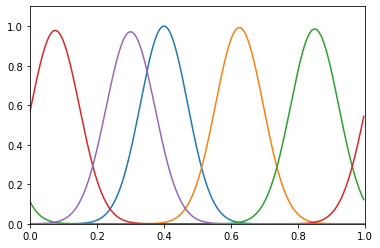

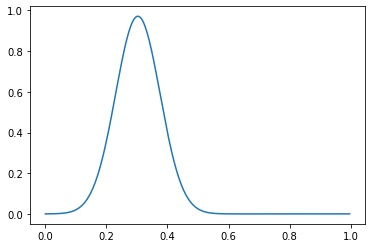

In [5]:
u0=lambda x : np.exp(-100.0*np.power(x-.4,2))

c = 1.0
M = 300
h = 1.0/M
x = np.linspace(0,1-h,M)
u = u0(x)
N = 300
tau = .9/N

for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    u = u - c * tau * DM(u,h)
    #u = u - c * tau * DP(u,h)  # instable

plt.figure()
plt.plot(x,u)


**Q2.b)** Même question pour $c=-1$. Qu'observe-t-on maintenant ?

$$ c=-1, \quad  u_0(x) = e^{-100(x-0.4)^2}, \quad T=0.9, M=N=300$$


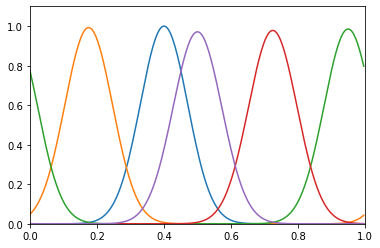

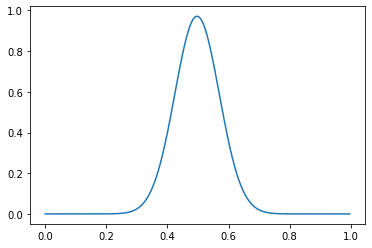

In [7]:
u0=lambda x : np.exp(-100.0*np.power(x-.4,2))

c = -1.0
M = 300
h = 1.0/M
x = np.linspace(0,1-h,M)
u = u0(x)
N = 300
tau = .9/N

for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    u = u - c * tau * DP(u,h)
    #u = u - c * tau * DM(u,h)  # instable

plt.figure()
plt.plot(x,u)


**Q3)** Constater la forte diffusion numérique induite par le schéma lorsque $|c|\frac{\tau}{h} \ll 1$ en comparant la solution approchée avec la solution analytique.
Prendre $$ c=1, \quad  u_0(x) = e^{-100(x-0.2)^2}$$

CFL=0.040000


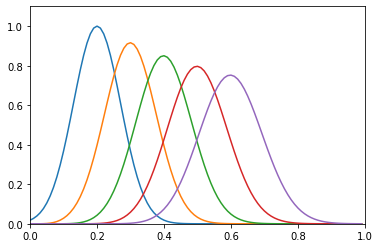

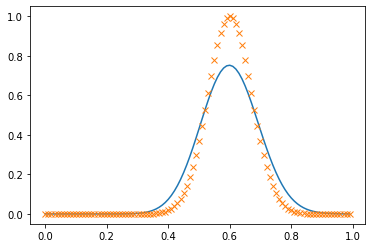

In [8]:
u0=lambda x : np.exp(-100.0*np.power(x-.2,2))
sol=lambda x,t: u0(x-t)
c = 1.0
M = 100
h = 1.0/M
x = np.linspace(0,1-h,M)
u = u0(x)
N = 1000
tau = .4/N
print("CFL=%f" % (np.abs(c)*tau/h))

for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    u = u - c * tau * DM(u,h)
plt.show()
plt.plot(x,u)
plt.plot(x,sol(x,0.4),'x')




**Q4)** On considère le schéma centré:
$$ 
\begin{cases}
\dfrac{v_j^{n+1} - v_j^n}{\tau} + c \dfrac{v_{j+1}^n - v_{j-1}^n}{2h} = 0 & \hbox{ pour } n\geq 0, 0\leq j\leq M-1 \\
v_M^n = v_0^n \\
v_j^0 = u_0(x_j). 
\end{cases}
$$
Implementer ce schéme et verifier numeriquement qu'il est instable (i.e. calculer la norme infinie de $v^n$).
Prendre $u_0$ comme dans la question **Q2)**.

CFL=0.090000


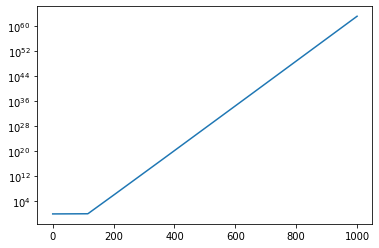

In [9]:
c = 1.0
M = 100
h = 1.0/M
x = np.linspace(0,1-h,M)
u = np.exp(-100.0*np.power(x-.4,2))
N = 1000
tau = .9/N
err=[]
print("CFL=%f" % (np.abs(c)*tau/h))

for i in range(N+1):
    u = u - c * tau * (0.5*DP(u,h)-0.5*DM(u,h))
    err.append(np.linalg.norm(u,np.inf))
plt.semilogy(err)
plt.show()


**Q5)** Considérer le schéma décentré amont d'ordre deux en espace, construit en posant

$$(\mathrm{D}^{-,2}_{h} v)_j = \frac{3v_{j} - 4v_{j-1} + v_{j-2}}{2h} \qquad (\mathrm{D}^{+,2}_{h} v)_j = \frac{-3v_{j} + 4v_{j+1} - v_{j+2}}{2h}$$

Si $c \geq 0$ on posera 

$$ v^{n+1} = v^n - \tau c \mathrm{D}_h^{-,2} v^n $$

Étudier la consistance de ce schéma. Comparer numériquement au schéma d'ordre 1 (via une fonction `DM2(u,h)`).

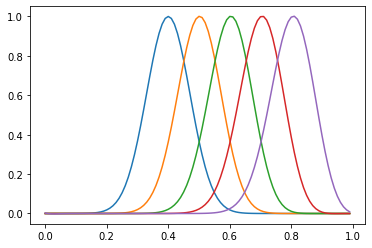

In [10]:
def DM2(u,h):
    return (3.0*u-4.0*np.roll(u,1)+np.roll(u,2))/(2.0*h)
def DP2(u,h):
    return (-3.0*u+4.0*np.roll(u,-1)-np.roll(u,-2))/(2.0*h)

c = 1.0
M = 100
h = 1.0/M
x = np.linspace(0,1-h,M)
u = np.exp(-100.0*np.power(x-.4,2))
N = 1000
tau = .4/N
for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
    u = u - c * tau * DM2(u,h)


## Exercice 2 :  Cas de la vitesse variable

On cherche désormais un schémas adapté à une vitesse variable. On considérera la vitesse suivante :
$v_1 : x \mapsto \cos(t)\sin(2\pi x)$ sur $(t,x)\in [0;2\pi]\times[0;1]$.

En choisissante d'utiliser DP ou DM en fonction du signe de la vitesse, proposez un schéma et testez-le pour cette vitesse.

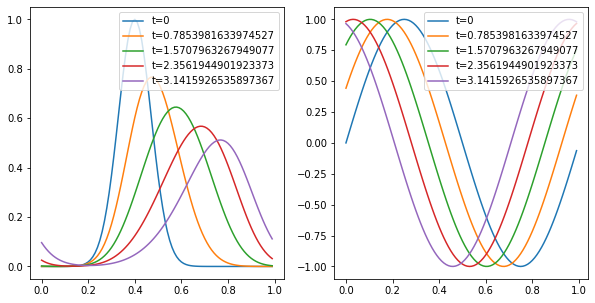

In [28]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

M = 100
h = 1.0/M
x = np.linspace(0,1-h,M)
vx = np.sin(2*np.pi*x)
u = np.exp(-100.0*np.power(x-.4,2))
N = 1000
tau = np.pi/N
t=0
for i in range(N+1):
    v = np.sin(2*np.pi*(x-5*t))
    if i%(N/4)==0:
        ax[0].plot(x,u,label=f"t={t}")
        ax[1].plot(x,v,label=f"t={t}")
    Du = np.where(v>0.,DM(u,h),DP(u,h))
    u = u - tau * v * Du
    t += tau
ax[0].legend()
ax[1].legend()


## Exercice 3 : Équation de Hamilton-Jacobi

Étant donnée $u_0:\mathbb T\to \Rsp$, il s'agit de trouver $u:[0,T]\times
  \mathbb T\to \Rsp$ vérifiant
  \begin{equation} \label{eq:hj}
    \begin{cases}
      \partial_t u(t,x) = |\partial_xu(t,x)| & \forall (t,x)\in[0,T]\times \mathbb T,\\
      u(0,\cdot) = u_0.
    \end{cases}
  \end{equation}
  
  
Soit $(\tau,h) = (\frac{1}{N},\frac{1}{M+1})$ un couple pas de temps/d'espace, nous
  considérons le schéma explicite suivant, dont  $v$ est solution si  $v^0_j = u_0(x_j)$ et si
  \begin{equation}\label{eq:hj:schema}
    \begin{aligned}
      &\dfrac{v^{n+1}_j - v^{n}_j}{\tau} = H_h v^n\quad \hbox{ pour } 1\leq j \leq M-1, 0\leq n \leq N-1 \\
      &\hbox{ où }
      H_h v = \max\left(0, \dfrac{v^n_{j+1} - v^n_j}{h}, \dfrac{v^n_{j-1} - v^n_j}{h}\right)
      \end{aligned}
  \end{equation}
  
**Q1)** Réécrire le schéma sous la forme 
$$ v^{n+1}=A_{\tau,h}v^{n} $$
et écrire une fonction python `Ath(u,tau,h)`.

In [8]:
def Ath(u,tau,h):
    return u+tau*np.maximum(0,np.maximum(DP(u,h),-DM(u,h)))


**Q2)** Implememter le schéma ci-dessus sur le domaine $[0,1]$ avec conditions au bord périodiques et l'appliquer à $u_0(x)=\sin(2\pi x)$ et $u_0(x)=\chi_{[1/3,2/3]}$. Choisir $h\leq\tau$ et commenter les résultats.

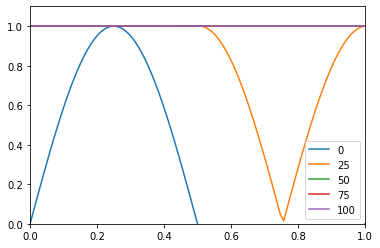

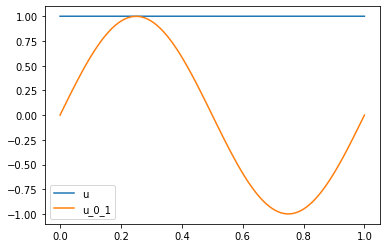

In [10]:
def u0_1(x):
    return np.sin(2*np.pi*x)
M = 100
h = 1.0/(M+1)
x = np.linspace(0,1,M)
u = u0_1(x)
N = 100
tau = 1/N
for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u,label=str(i))
        plt.axis([0, 1., 0., 1.1])
    u = Ath(u,tau,h)
plt.legend()
plt.figure()
plt.plot(x,u,label="u")
plt.plot(x,u0_1(x),label="u_0_1")
plt.legend()


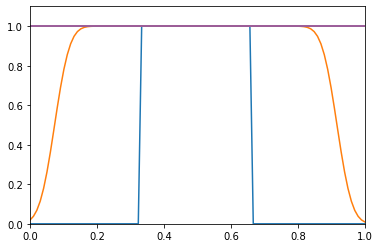

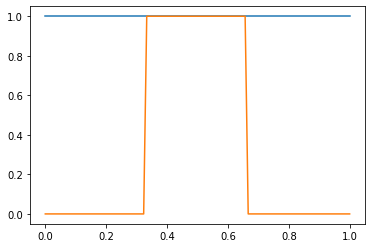

In [11]:
u0_2=lambda x : 1.*(x>=1/3)*(x<=2/3) 
M = 100
h = 1.0/(M+1)
x = np.linspace(0,1,M)
u = u0_2(x)
N = 200
tau = 1.0/N

for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    u = Ath(u,tau,h)
plt.figure()
plt.plot(x,u)
plt.plot(x,u0_2(x))


**Q3)** On considére maintenant la variante suivante
  \begin{equation} \label{eq:hjalpha}
    \begin{cases}
      \partial_t u(t,x) = \alpha(x)|\partial_xu(t,x)| & \forall (t,x)\in[0,T]\times \mathbb T,\\
      u(0,\cdot) = u_0.
    \end{cases}
  \end{equation}
où $\alpha(x)$ est la vitesse de propgation de front ($\alpha$ est une fonction conitnue, positive bornée).
Adpter la schéma proposé dans ce cas et l'appliquer au domaine et aux conditions initiales de la question precedente avec $\alpha(x)=\frac{3}{2}+\cos(2\pi x)$. Quelle elle la condition CFL dans ce cas?

CFL : 0.505
CFL : 0.505


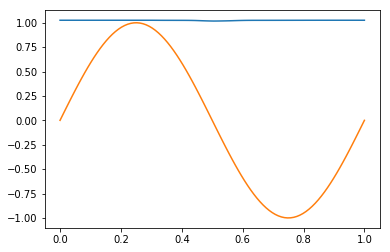

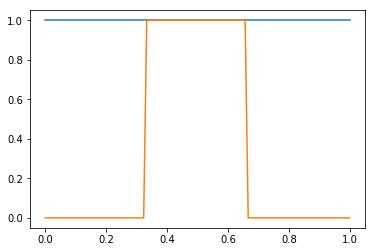

In [147]:
alpha= lambda x: 3./2+np.cos(2*np.pi*x)

def Ath_alpha(u,tau,h,x):
    return u+tau*alpha(x)*np.maximum(0,np.maximum(DP(u,h),-DM(u,h)))
M = 100
h = 1.0/(M+1)
x = np.linspace(0,1,M)
u = u0_1(x)
N = 200
tau = 1.0/N
print("CFL : %g" %(tau/h))
for i in range(N+1):
    u = Ath_alpha(u,tau,h,x)
plt.figure()
plt.plot(x,u)
plt.plot(x,u0_1(x))




u = u0_2(x)
N = 200
tau = 1.0/N
print("CFL : %g" %(tau/h))
for i in range(N+1):
    u = Ath_alpha(u,tau,h,x)
plt.figure()
plt.plot(x,u)
plt.plot(x,u0_2(x))


## Exercice 3  (pour aller plus loin) : le schéma de Lax-Wendroff 

On considère le schéma suivant, où l'on adopte la convention $v_M^n = v_0^n$:

$$ 
\begin{cases}
\dfrac{v_j^{n+1} - v_j^n}{\tau} + c \dfrac{v_{j+1}^n - v_{j-1}^n}{2h} - c^2 \tau \dfrac{v_{j+1}^n - 2v_j^n + v_{j-1}^n}{2h^2} = 0 & \hbox{ pour } n\geq 0, 0\leq j\leq M-1 \\
v_M^n = v_0^n \\
v_j^0 = u_0(x_j) 
\end{cases}
$$

**Q1)** En prenant pour condition initiale une gaussienne (comme dans l'exerice 1), vérifier que le schéma n'induit pas de diffusion numérique.

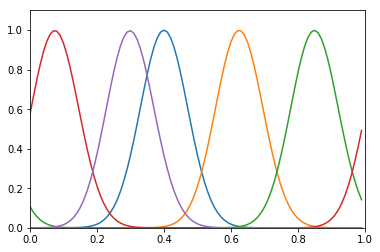

In [88]:
u0= lambda x : np.exp(-100.0*np.power(x-.4,2))


c = 1.0
M = 100
h = 1.0/M
x = np.linspace(0,1-h,M)
u = u0(x)
N = 100
tau = .9/N
alpha = c*tau/h

for i in range(N+1):
    if i%(N/4)==0:
        
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    up = np.roll(u,-1)
    um = np.roll(u,1)
    u = (alpha**2+alpha)/2 * um  + (1-alpha**2) * u + (alpha**2-alpha)/2 * up



**Q2)** Comparez maintenant ce schéma avec le schéma décentré amont (de l'exercice 2) pour une vitesse constante et une donnée initiale de type créneau :
$$u_0 = \begin{cases} 1 & \text{si $x \in [0.25;5]$,} \\ 0 & \text{sinon.}
\end{cases}$$